## Intro Section

### 1. Write 5 examples of the application of ML methods in life.What is the benefit of using machine learning methods in each of your examples?
- Планировщик покупок. Оптимальный выбор магазина на основе списка покупок.
- Калькулятор стоимости ремонта. Введи площадь комнаты и материалы – получи примерную цену.
- Асистент повара. Подбор рецепта по остаткам в холодильнике.
- Калькулятор стоимости поездки. Анализ расстояния, пробок, тарифов.
- Подбор фильмов по настроению. 

### 2. Use the classification of tasks in the introduction to decide which class you can assign to the tasks from the table above and to the 5 examples you provided.

- Планировщик покупок - `Supervized regression`
- Калькулятор стоимости ремонта - `Supervized regression`
- Асистент повара. `Binary classification` (определить, подходит ли рецепт или нет). 
- Калькулятор стоимости поездки - `Supervized regression`
- Подбор фильмов по настроению - `Supervized classification`

### 3. Think about what the difference is between multiclass and multilabel.

В чем разница между `Мультиклассовой классификацией`(Multiclass) и `Многометочной классификацией`(Multilabel). В первом случае модель присваивает объекту один из возможных классов (например определить по фото цифру от 0 до 9), во втором модель присваивает несколько не исключающих друг друга меток одновременно (например определение диагнозов пациента или тегов для статьи). 

### 4. Is an example case with house prices from the theory a classification of a regression problem? Is it possible to reduce the regression problem to classification?
Пример с калькулятором стоимости жилья конечно же относится к `проблеме регрессии`, так как относится к прогнозу вещественного значения на основе вводных характеристик. Эту проблему можно перевести в разряд проблем классификации, заменив целевое вещественное значение на набор диапазонов, в которых это значение могло бы быть. Например, можно создать категории: [0–100 тыс.], [100–200 тыс.], [200–300 тыс.] и т.д., а в результате модель выдавала бы диапазон значений, как ответ на проблему.

## 2. Introduction to Data Analysis

### 1. Import the libraries...

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

### 2. Load data from `kaggle` using pandas. You only need table data and `train.json`.

In [2]:
train_data = pd.read_json("train.json")

### 3. What is the size of your data?

In [3]:
print(f"[{train_data.shape[0]} rows x {train_data.shape[1]} columns]")

[49352 rows x 15 columns]


### 4. Print the list of columns. Which column is a target? 

In [4]:
for i, col in enumerate(train_data.columns):
    print(f"{i:2}. {col}")

 0. bathrooms
 1. bedrooms
 2. building_id
 3. created
 4. description
 5. display_address
 6. features
 7. latitude
 8. listing_id
 9. longitude
10. manager_id
11. photos
12. price
13. street_address
14. interest_level


Целевым столбцом, согласно идее с Keggle здесь является столбец с индексом `14`: `interest_level` (интерес покупателей). Дальше мы используем как целевой столбец `12`:`price`, поэтому он тоже может быть целевым для решения проблем рецессии. 

### 5. Make a quick analysis of the data: use the methods info(), describe(), corr(). Explain the results of the outputs. Are there any empty columns?

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


`.info()` выводит основную информацию по таблице - размер, название столбцов и их тип. Согласно ему в таблице 74659 записей и не одного null поля.

In [6]:
train_data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


`.describe()` выводит основные статистические данные для числовых(float64(3), int64(3) в нашем случае) столбцов - среднее, отклонение, мин/макс и квантили.

In [7]:
numeric_cols = train_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
correlation_matrix

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


`.corr()` - выводит корреляцию между столбцами. Если 2 различных столбца сильно коррелируют, нужно задуматья об удалении одного из них

In [8]:
train_data.isna().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

#### Are there any empty columns? - `NO`

### 6. We'll work with only 3 features: `'bathrooms'`, `'bedrooms'`, `'interest_level'` and with the target column `'price'`. Create a dataframe with only these columns.

In [9]:
df = train_data[['bathrooms', 'bedrooms', 'interest_level', 'price']]

## 3. Statistical Data Analysis

### 3. Target analysis

#### 1. Plot a histogram to understand the distribution of the target. Is it all clear?

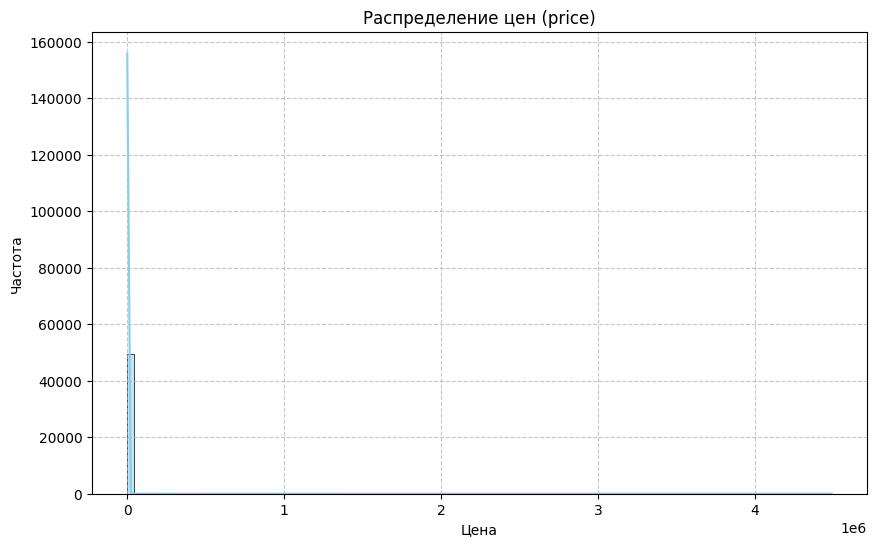

In [10]:
def plot_hist():
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price'], bins=100, kde=True, color='skyblue') 
    plt.title('Распределение цен (price)')
    plt.xlabel('Цена')
    plt.ylabel('Частота')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

plot_hist()

С распределением все очень плохо, потому что присутствуют выбросы. 

#### 2. The next step is boxplot(). What can you say about the target? Are there any outliers?

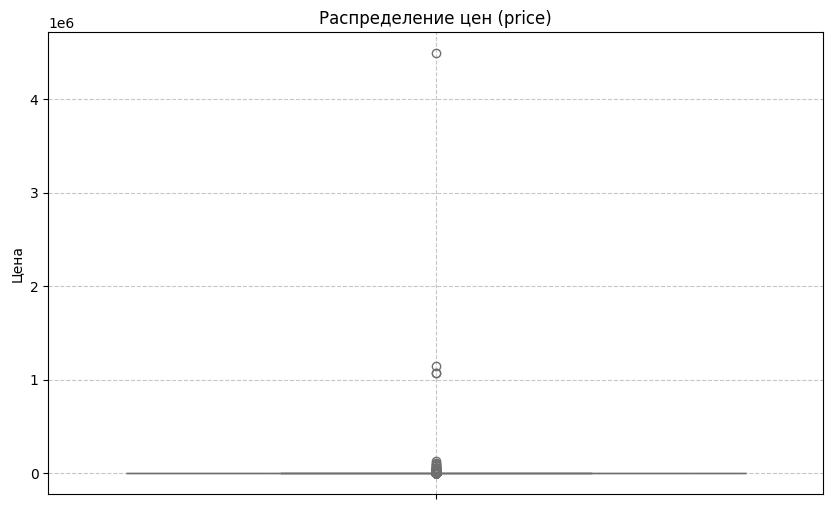

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['price'], color='skyblue') 
plt.title('Распределение цен (price)')
plt.ylabel('Цена')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Видим, что в списке квартир существуют сверхдорогие предложения, сильно выбивающиеся из распределения

#### 3. Drop the rows that are outside the 1 and 99 percentiles from the target column.

In [12]:
upper_limit = df['price'].quantile(0.99)
lower_limit = df['price'].quantile(0.01)
df = df[df['price'].between(lower_limit, upper_limit)]


#### 4. Plot another histogram for price. Explain the result.

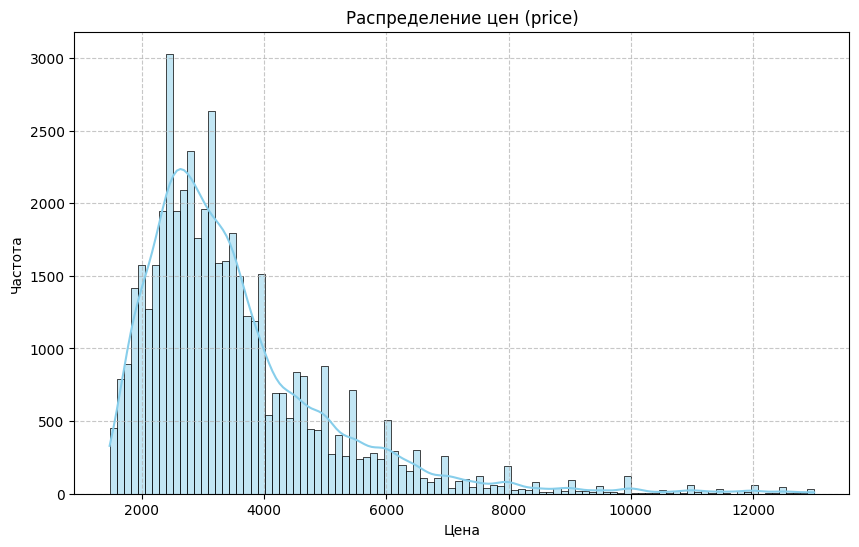

In [13]:
plot_hist()

Теперь стал явно прослеживаться статистический характер цен на недвижимость в таблице. Он и раньше был, но хорошо проявился после удаления выбросов и определения масштабов.

## 4. Characteristics analysis

### 1. What is the type of column 'interest_level'?

In [14]:
df['interest_level'].dtype

dtype('O')

Тип столбца `interest_level` - object

In [15]:
f"{df['interest_level'].memory_usage(deep=True) / 1024} Kb"

'2870.755859375 Kb'

### 2. Print the values in this column. How many entries does each value contain?

In [16]:
df['interest_level']

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 48379, dtype: object

In [17]:
df['interest_level'].value_counts()

interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64

### 3. Encode these values. For example, you can replace each value with 0, 1, or 2.

In [18]:
mapping = {'low'   : 0, 
           'medium': 1, 
           'high'  : 2}

df['interest_level'] = df['interest_level'].map(mapping)

In [19]:
f"{df['interest_level'].memory_usage(deep=True) / 1024} Kb"

'755.921875 Kb'

Благодаря этому, размер столбца уменьшился в 4 раза.

### 4. Plot histograms for the features 'bathrooms', 'bedrooms'. Are there any outliers?

Text(0.5, 1.0, 'Спальные комнаты')

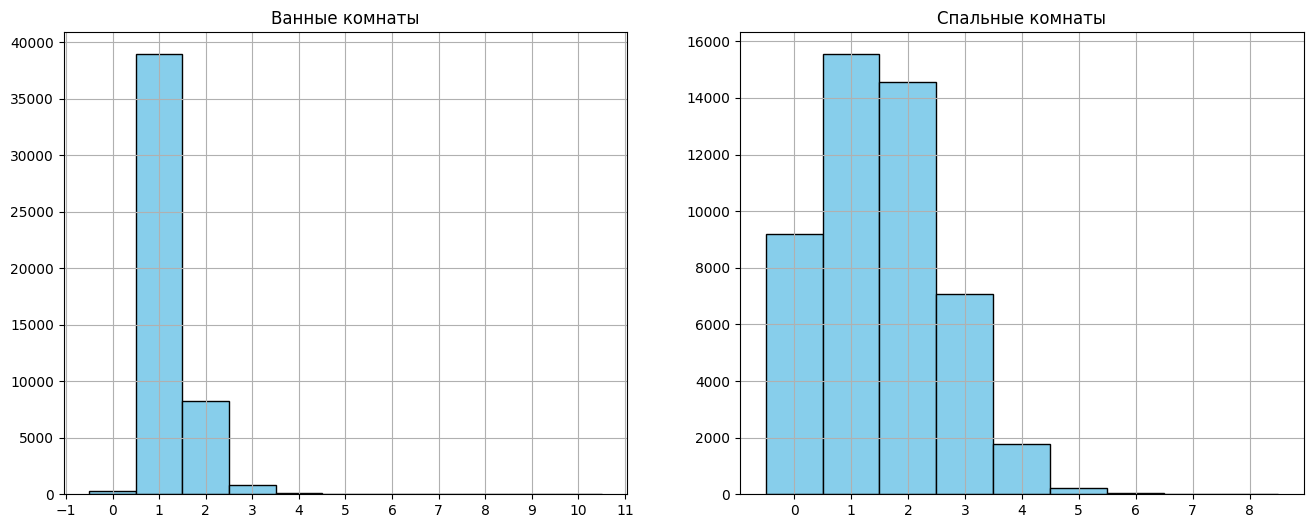

In [20]:
def format_axes(ax):
    ax.autoscale(enable=True, axis='both', tight=None)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.grid(True)

hist_settings = {'color':'skyblue', 
                 'align':'mid',
                 'edgecolor':'black', 
                 'linewidth':'1'}

fig, ax = plt.subplots(1,2, figsize=(16,6))


bin_edges = np.arange(min(df['bathrooms'])-0.5, max(df['bathrooms'])+1.5, 1)
ax[0].hist(df['bathrooms'],bins=bin_edges, **hist_settings)
format_axes(ax[0])
ax[0].set_title("Ванные комнаты")

bin_edges = np.arange(min(df['bedrooms'])-0.5, max(df['bedrooms'])+1.5, 1)
ax[1].hist(df['bedrooms'], bins=bin_edges, **hist_settings)
format_axes(ax[1])
ax[1].set_title("Спальные комнаты")


Eсть квартира с 10! ванными комнатами. Я бы убрал ее как выброс, но в задании такого нет.

## 5. Complex analysis

### 1. Plot a correlation matrix to understand the correlation between features and target. Plot a heat map for the correlation matrix. Is there a correlation?

<Axes: >

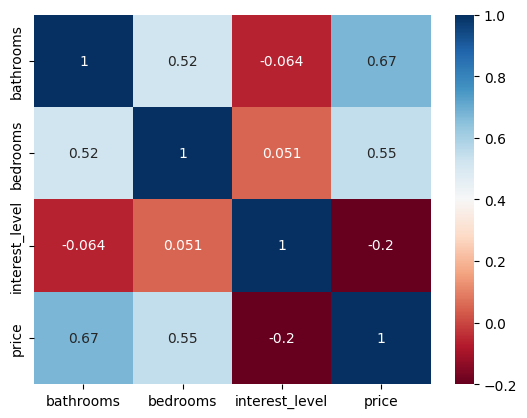

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu')

1. Видим положительную корреляцию цены с количеством спален и ванных комнат. 
2. Того же не скажешь об уровне интереса - более дорогимим квартирами интересуются реже. 
3. Количество спален и ванных пытаются соответствовать - реже наблюдаются квартиры с несколькими спальнями и с малым количеством ван и наоборот. 
4. Количество спален и ванных не влияют на интерес, цена тут играет решающую роль. 

### 2. Plot a scatterplot to visualize the correlation between the features and the target. You should return 3 plots where the X-axis is the target and the Y-axis is a feature.

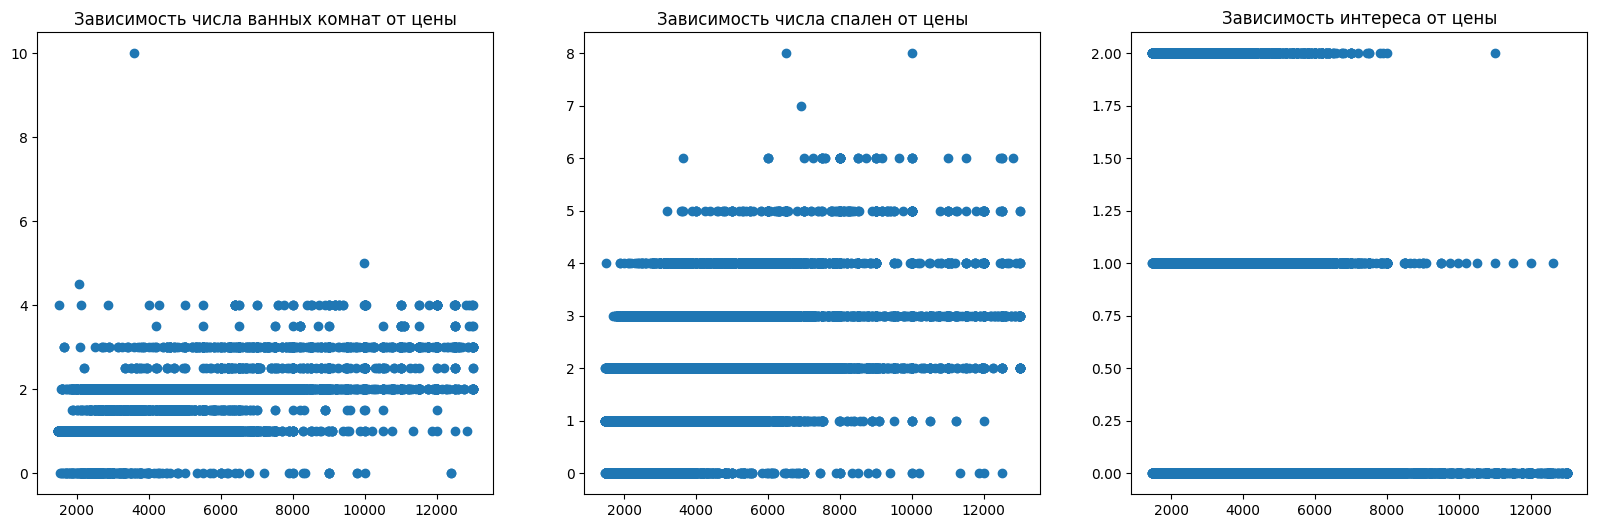

In [22]:
def scatterPlot(ax, feature, target, title):
    ax.set_title(title)
    ax.scatter(x=target, y=feature)


fig, ax = plt.subplots(1,3, figsize=(20,6))
scatterPlot(ax[0],df['bathrooms'],df['price'],"Зависимость числа ванных комнат от цены")
scatterPlot(ax[1],df['bedrooms'],df['price'],"Зависимость числа спален от цены")
scatterPlot(ax[2],df['interest_level'],df['price'],"Зависимость интереса от цены")

## Creating Features

### 1. You can create as many features as you want. Are the new features more correlated with the target than the basic features?

In [23]:
df["bed_bath"] = df["bedrooms"] * df["bathrooms"]
df["bedrooms_squared"] = df["bedrooms"]**2
df["bathrooms_squared"] = df["bathrooms"]**2

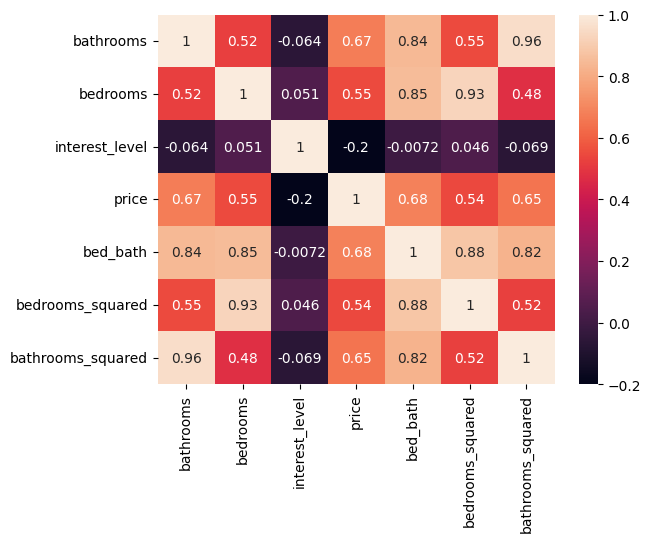

In [24]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### 2. To train the model here, we will not use your new features.

In [25]:
df.drop(columns=["bed_bath","bedrooms_squared", "bathrooms_squared"], 
        inplace=True)

### 4. To use PolynomialFeatures, we first need to split the data into training and test samples. We have already done this for you, please read the training and test data.

In [26]:
df_train = pd.read_json("train.json")[['bathrooms', 'bedrooms', 'price']]
df_test  = pd.read_json("test.json")[['bathrooms', 'bedrooms', 'price']]

X_train = df_train[['bathrooms', 'bedrooms']]
Y_train = df_train[['price']]

X_test = df_test[['bathrooms', 'bedrooms']]
Y_test = df_test[['price']]

### 5. Initialize PolynomialFeatures() with a degree of 10.


In [27]:
polyPreprocessor = PolynomialFeatures(degree=10)

6. Apply `PolynomialFeatures()` to fit and transform your training and test data.

In [28]:
X_train_poly = pd.DataFrame(data=polyPreprocessor.fit_transform(X_train),
                            columns=polyPreprocessor.get_feature_names_out())

X_test_poly = pd.DataFrame(data=polyPreprocessor.fit_transform(X_test),
                            columns=polyPreprocessor.get_feature_names_out())

## 5. Now you need to train 3 models: linear regression, decision tree and naive model. We will use them as black boxes without deep understanding.

### 1. Results table

#### 1. Create two empty Pandas DataFrames with columns 'model', 'train', 'test'. Let's call the first one result_MAE and the second one result_RMSE. We will fill these tables with the results of the models.


In [29]:

result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

### 2. Linear Regression

#### 1. Initialize linear regression from sklearn with no parameters.

In [30]:
linear_model = LinearRegression()

#### 2. Fit your model and make predictions on training and test features. Save it as new columns in data.

In [31]:
def fill_data(model_name, Y_train, Y_test, Y_pred_train, Y_pred_test):
    MAE_train = mean_absolute_error(Y_train, Y_pred_train)
    MAE_test = mean_absolute_error(Y_test, Y_pred_test)

    RMSE_train = root_mean_squared_error(Y_train, Y_pred_train)
    RMSE_test = root_mean_squared_error(Y_test, Y_pred_test)

    result_MAE.loc[len(result_MAE)] = [model_name, MAE_train, MAE_test]
    result_RMSE.loc[len(result_RMSE)] = [model_name, RMSE_train, RMSE_test]


In [32]:
linear_model.fit(X_train, Y_train)

Y_pred_train = linear_model.predict(X_train)
Y_pred_test = linear_model.predict(X_test)

fill_data('linear_regression', Y_train, Y_test, Y_pred_train, Y_pred_test)


### 3. Decision Tree

In [33]:
tree_model = DecisionTreeRegressor(random_state=21)

tree_model.fit(X_train, Y_train)

Y_pred_train = tree_model.predict(X_train)
Y_pred_test = tree_model.predict(X_test)

fill_data('decision_tree', Y_train, Y_test, Y_pred_train, Y_pred_test)

### 4. Naive Model

In [34]:
naive_mean = DummyRegressor(strategy="mean")

naive_mean.fit(X_train, Y_train)

Y_pred_train = naive_mean.predict(X_train)
Y_pred_test = naive_mean.predict(X_test)

fill_data('naive_mean', Y_train, Y_test, Y_pred_train, Y_pred_test)

#### ------------------

naive_median = DummyRegressor(strategy="median")

naive_median.fit(X_train, Y_train)

Y_pred_train = naive_median.predict(X_train)
Y_pred_test = naive_median.predict(X_test)

fill_data('naive_median', Y_train, Y_test, Y_pred_train, Y_pred_test)

### 5. Compare the results

#### 1. Print your final result_MAE and result_RMSE tables.

In [35]:
result_MAE

,model,train,test
0,linear_regression,1111.027181,1042.046962
1,decision_tree,1058.108940,995.532299
2,naive_mean,1549.642449,1472.158024
3,naive_median,1400.344403,1322.640673


In [36]:
result_RMSE

,model,train,test
0,linear_regression,22009.727935,9645.142166
1,decision_tree,21992.863614,9578.657684
2,naive_mean,22066.642317,9713.365477
3,naive_median,22077.122545,9731.481148


#### 2. Which is the best model

`Модель дерева решения (Decision Tree)` показала себя лучше, чем все остальные. Наивные модели оказались самыми плохими.